Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    102855
           1       0.37      0.33      0.35       232

    accuracy                           1.00    103087
   macro avg       0.68      0.66      0.67    103087
weighted avg       1.00      1.00      1.00    103087



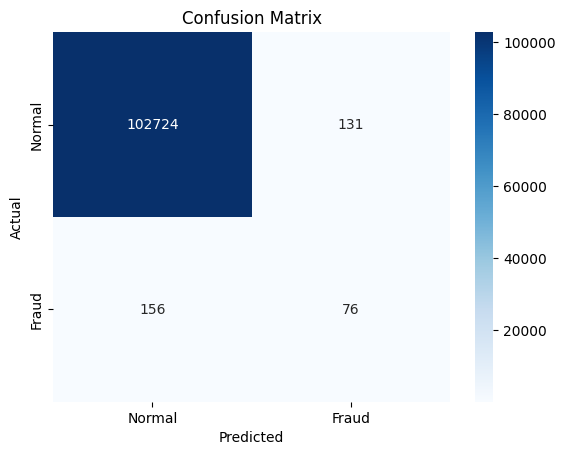

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("creditcard.csv")

# Remove rows with missing values (if any)
df = df.dropna()

# Drop 'Time' column
df = df.drop(columns=['Time'])

# Separate the label
y_true = df['Class']
df = df.drop(columns=['Class'])

# Normalize the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Train Isolation Forest
model = IsolationForest(contamination=0.002, random_state=42)
model.fit(df)

# Predict anomalies
y_pred = model.predict(df)
y_pred = np.where(y_pred == 1, 0, 1)  # Convert: 1=normal → 0, -1=anomaly → 1

# Re-check for NaNs in y_true before evaluation
y_true = y_true.fillna(0).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
